# RSA Analysis 
Comparing BART output with activity in BA10.

In this doc we will only work with pymvpa betas. And go more in depth as to what's driving the correlations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == 'darwin':
    cfg = os.path.join("/Users", "njchiang", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "osx"

elif sys.platform == "linux":
    import platform
    if platform.linux_distribution()[0] == "debian":
        cfg = os.path.join("/home", "njchiang", "data", "CloudStation", "Grad",
                           "Research", "montilab-ucla", "analogy", "config", "project.json")
        plat = "linux"
    else:
        cfg = os.path.join("/u", "project", "monti", "Analysis", "Analogy",
                           "code", "analogy", "config", "project.json")
        plat = "hoff"
else:
    cfg = os.path.join("D:\\", "CloudStation", "Grad",
                       "Research", "montilab-ucla", "analogy", "config", "project.json")
    plat = "win"

with open(cfg, "r") as f:
    projectSettings = json.load(f)

paths = projectSettings["filepaths"]["{}Paths".format(plat)]
sys.path.append(paths["github"])
sys.path.append(paths["code"])

In [3]:
from fmri.analogy_utils import analysisSettings, contrastSettings, order, \
    pu, pa, pv, compile_models, rsa, save_rois, load_rois


Loading JSON config from /u/project/monti/Analysis/Analogy/code/analogy/config/analyses.json
Loading JSON config from /u/project/monti/Analysis/Analogy/code/analogy/config/contrasts.json
Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy/labels/trialorder_rsa_absorted.csv


## Models

Loading in models from mat files


In [4]:
from fmri.analogy_rsa import  \
downsample_rdms_df_by_factor, create_models, models_to_df, plotmodels\
, roi_rdm, run_rsa_dfs, subject_rdms, plot_results, get_model_rdms, \
reduce_by_factor

In [5]:
# modelnames = ["rel", "humanratings", "w2vdiff", "rstpostprob9", "rstpostprob79", "numchar", "concatword", "typicality"]

modelnames = ["mainrel", "subrel", 
              "rel", "humanratings", "numchar", 
              "w2vdiff", "concatword", 
              "rstpostprob9", "rstpostprob79", 
              ["rstpostprob79", "concatword"] 
#               ["rel", "w2vdiff"], 
#               ["rstpostprob9", "concatword"],
#               ["rstpostprob9", "w2vdiff"]
             ]

# modelnames = ["mainrel", "subrel", "rel", "humanratings"]

raw_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
model_rdms = get_model_rdms(raw_models_df, modelnames)
model_rdms

Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy/labels/raw_models.csv


,type,name,0,1,2,3,4,5,6,7,...,41318,41319,41320,41321,41322,41323,41324,41325,41326,41327
0,full,mainrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,full,subrel,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,full,rel,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
3,full,humanratings,1.110223e-16,3.456765e-04,3.456765e-04,2.766465e-06,2.766465e-06,1.883798e-05,1.883798e-05,3.297221e-05,...,6.416471e-05,6.416471e-05,2.558104e-05,2.558104e-05,0.000000e+00,8.717536e-06,8.717536e-06,8.717536e-06,8.717536e-06,0.000000e+00
4,full,numchar,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,1.000000e+00,...,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
5,full,w2vdiff,2.220446e-16,9.333585e-01,9.333585e-01,9.557922e-01,9.557922e-01,1.064554e+00,1.064554e+00,8.855721e-01,...,1.053615e+00,1.053615e+00,1.055370e+00,1.055370e+00,0.000000e+00,9.636183e-01,9.636183e-01,9.636183e-01,9.636183e-01,0.000000e+00
6,full,concatword,2.220446e-16,9.178494e-01,9.178494e-01,9.101928e-01,9.101928e-01,8.221301e-01,8.221301e-01,9.333544e-01,...,8.809809e-01,8.809809e-01,8.631256e-01,8.631256e-01,0.000000e+00,8.517704e-01,8.517704e-01,8.517704e-01,8.517704e-01,1.110223e-16
7,full,rstpostprob9,0.000000e+00,1.438243e-02,1.438243e-02,1.696986e-01,1.696986e-01,1.129309e-02,1.129309e-02,2.790716e-02,...,2.004162e-01,2.004162e-01,5.986077e-02,5.986077e-02,0.000000e+00,2.267369e-01,2.267369e-01,2.267369e-01,2.267369e-01,0.000000e+00
8,full,rstpostprob79,0.000000e+00,1.420752e-01,1.420752e-01,2.476321e-01,2.476321e-01,1.672532e-01,1.672532e-01,1.220956e-01,...,3.427279e-01,3.427279e-01,1.810736e-01,1.810736e-01,0.000000e+00,4.030399e-01,4.030399e-01,4.030399e-01,4.030399e-01,0.000000e+00
9,full,'rstpostprob79'+'concatword',1.110223e-16,5.649513e-01,5.649513e-01,6.353464e-01,6.353464e-01,5.252475e-01,5.252475e-01,5.725416e-01,...,7.545284e-01,7.545284e-01,5.682479e-01,5.682479e-01,2.220446e-16,7.349043e-01,7.349043e-01,7.349043e-01,7.349043e-01,1.110223e-16


Loading label file from: /u/project/monti/Analysis/Analogy/code/analogy/labels/raw_models.csv


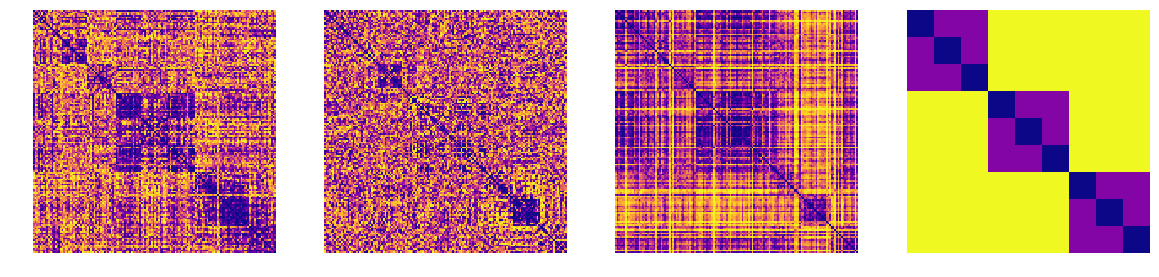

In [6]:
# model_figure
# plotmodels_old(models, save=False)

modelnames = ["concatword", "w2vdiff", "rstpostprob79", "rel"]

raw_vis_models_df = pu.load_labels(os.path.join(paths["code"], "labels", "raw_models.csv"))
vis_model_rdms = get_model_rdms(raw_vis_models_df, modelnames)



f = plt.figure(figsize=(20,10))
axarr = f.subplots(1, len(vis_model_rdms.name.unique()))
rdms = vis_model_rdms[vis_model_rdms.type == "avg"]
for j, m in enumerate(vis_model_rdms.name.unique()):
    pv.plot_rdm(rdms[rdms.name==m].iloc[:, 2:].dropna(axis=1),
           ax=axarr[j], cb=False, cmap="plasma")
#     axarr[j].set_title(m)
    axarr[j].set_axis_off()
    
# f.savefig(os.path.join(paths["cloud"], "Figures", "rsa-models.png"))

In [7]:
masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
masks_dict["rlpfc-hobeika"] = "anat-left-rlpfc-hobeika2016"
masks_dict["rlpfc-power"] = "anat-left-rlpfc-power2011"
masks_dict["dlpfc-power"] = "anat-left-dlpfc-power2011"
masks_dict["vlpfc-power"] = "anat-left-vlpfc-power2011"
masks_dict["spl-power"] = "anat-left-spl-power2011"
masks_dict["ipl-power"] = "anat-left-ipl-power2011"
masks_dict

{'BA10m': 'dfc-left-ba10_mask',
 'BA10l': 'neubert-left-FPl-dil2-handmasked_mask',
 'BA44': 'harvardoxford-thr25-left-ba44_mask',
 'BA9': 'dfc-left-ba9_mask',
 'BA45': 'harvardoxford-thr25-left-ba45_mask',
 'BA46': 'dfc-mod-left-ba46_mask',
 'BA47': 'neubert-mod-left-ba47_mask',
 'lpstg': 'harvardoxford-thr25-left-pSTG_mask',
 'laitg': 'harvardoxford-thr25-left-aITG_mask',
 'lpmtg': 'harvardoxford-thr25-left-pMTG_mask',
 'ltp': 'harvardoxford-thr25-left-temporalpole_mask',
 'ltomtg': 'harvardoxford-thr25-left-toMTG_mask',
 'lastg': 'harvardoxford-thr25-left-aSTG_mask',
 'lspl': 'juelich-left-SPL-7A_mask',
 'lips': 'juelich-left-IPS_mask',
 'psmg': 'juelich-left-IPL-PFm_mask',
 'lag': 'juelich-left-IPL-Pga_mask',
 'v1': 'aal-v1_mask',
 'csf': 'csf-bin_mask',
 'rlpfc-hobeika': 'anat-left-rlpfc-hobeika2016',
 'rlpfc-power': 'anat-left-rlpfc-power2011',
 'dlpfc-power': 'anat-left-dlpfc-power2011',
 'vlpfc-power': 'anat-left-vlpfc-power2011',
 'spl-power': 'anat-left-spl-power2011',
 'ipl-p

## Loading betas

Loading sub-01 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-01/rois/sub-01_cope-LSS_labels.csv
Loading sub-02 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-02/rois/sub-02_cope-LSS_labels.csv
Loading sub-03 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-03/rois/sub-03_cope-LSS_labels.csv
Loading sub-04 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-04/rois/sub-04_cope-LSS_labels.csv
Loading sub-05 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-05/rois/sub-05_cope-LSS_labels.csv
Loading sub-06 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-06/rois/sub-06_cope-LSS_labels.csv
Loading sub-07 betas
Loading label file from: /u/project/monti/Analysis/Analogy/derivatives/sub-07/rois/sub-07_cope-LSS_labels.csv
Loading sub-08 betas
Loading label file from: /u/project/monti/Analysis/Analogy/der

[Text(0, 0, 'BA10l'),
 Text(0, 0, 'BA10m'),
 Text(0, 0, 'BA44'),
 Text(0, 0, 'BA45'),
 Text(0, 0, 'BA46'),
 Text(0, 0, 'BA47'),
 Text(0, 0, 'BA9'),
 Text(0, 0, 'csf'),
 Text(0, 0, 'dlpfc-power'),
 Text(0, 0, 'ipl-power'),
 Text(0, 0, 'lag'),
 Text(0, 0, 'laitg'),
 Text(0, 0, 'lastg'),
 Text(0, 0, 'lips'),
 Text(0, 0, 'lpmtg'),
 Text(0, 0, 'lpstg'),
 Text(0, 0, 'lspl'),
 Text(0, 0, 'ltomtg'),
 Text(0, 0, 'ltp'),
 Text(0, 0, 'psmg'),
 Text(0, 0, 'rlpfc-hobeika'),
 Text(0, 0, 'rlpfc-power'),
 Text(0, 0, 'spl-power'),
 Text(0, 0, 'v1'),
 Text(0, 0, 'vlpfc-power')]

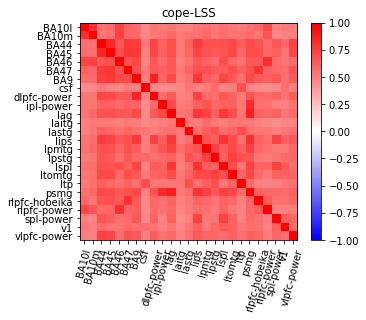

In [8]:
# masks_dict = analysisSettings["roi"]["masks"]
b = analysisSettings["roi"]["t"]
# b = "cope-LSS"
# b = "cope-LSS-condensed"
# b = "tstat-subrel"
# b = "LSS-condensed"
# b = "tstat-LSS"
# b = "LSA"
# b = "pymvpa"

# metric="correlation"
metric="correlation"
try: 
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)
except (FileNotFoundError, KeyError):
    save_rois(masks_dict, b)
    rois, labels = load_rois(b)
    full_rdms = subject_rdms(rois, labels, masks_dict, metric=metric, b=b)

    
# Relationship between ROIs:
f = plt.figure()
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, mode="corr", cb=True, cmap="bwr", scale=False, rank=False, vmin=-1, vmax=1)
ax.set_title(b)
roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)


In [9]:
rdms.head()

,type,name,0,1,2,3,4,5,6,7,...,41318,41319,41320,41321,41322,41323,41324,41325,41326,41327
0,avg,concatword,9.178494e-01,9.101928e-01,8.221301e-01,9.333544e-01,8.179570e-01,8.865194e-01,8.405514e-01,8.031837e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,avg,w2vdiff,9.333585e-01,9.557922e-01,1.064554e+00,8.855721e-01,8.490209e-01,1.062399e+00,7.271608e-01,7.789089e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,avg,rstpostprob79,1.420752e-01,2.476321e-01,1.672532e-01,1.220956e-01,1.005905e-01,2.884701e-01,1.638003e-01,1.264852e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,avg,rel,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


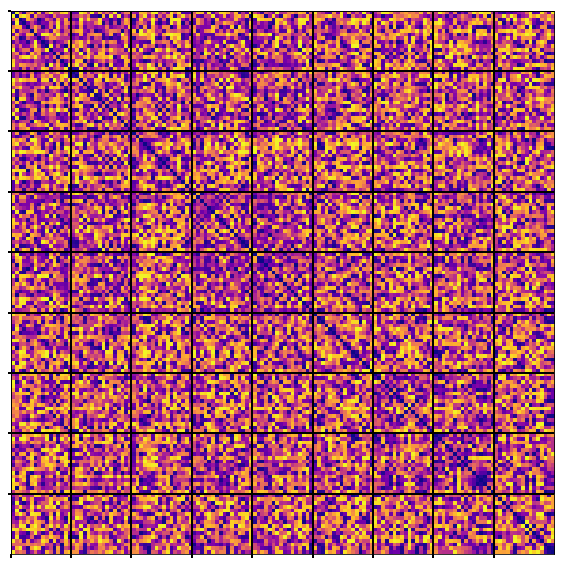

In [12]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f = plt.figure(figsize=(10, 10))
ax = f.gca()
rdms = full_rdms
for m in masks_dict:
    pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=ax, cmap="plasma", cb=False)
    # ax.set_title(m)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(which="major", color="black", linestyle="-", linewidth=2)

    f.savefig(os.path.join(paths["cloud"], "analysis", "rsa", "Figures", "rdms", "{}-{}-rdm.png".format(b, m)))

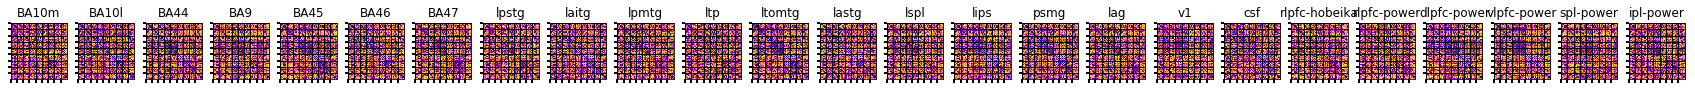

In [12]:
# visualize models
# plotmodels_old(models, save=False)
# f = plt.figure(figsize=(20,10))
# axarr = f.subplots(1, len(model_rdms.name.unique()))
ticks = np.arange(0, 144, 16) - 0.5

f, axarr = plt.subplots(1,len(masks_dict), figsize=(30, 10))
rdms = full_rdms
for i, m in enumerate(masks_dict):
    pv.plot_rdm(rdms.groupby(["betatype", "roi"]).mean().loc[b, m], ax=axarr[i], cmap="plasma", cb=False)
    axarr[i].set_title(m)
    axarr[i].xaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].yaxis.set_major_formatter(plt.NullFormatter())
    axarr[i].xaxis.set_tick_params(width=2)
    axarr[i].yaxis.set_tick_params(width=2)
    axarr[i].set_xticks(ticks)
    axarr[i].set_yticks(ticks)
    axarr[i].grid(which="major", color="black", linestyle="-", linewidth=1)
    
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-avg-rdms.png".format(b)))

## Visualization

In [ ]:
# Relationship between the models
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
# f, axarr = plt.subplots(1,3, figsize=(11, 8.5))
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="bwr", mode="corr",
                 scale=False, rank=False, vmin=-1, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)
ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman.png"))

f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
im = pv.plot_rdm(model_rdms[model_rdms.type == "avg"].dropna(axis=1).iloc[:, 2:].T.corr(method="spearman"), 
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
f.colorbar(im, fraction=0.046, pad=0.04)

ax.set_xticks(range(len(modelnames)))
ax.set_yticks(range(len(modelnames)))
ax.set_yticklabels(modelnames)
ax.set_xticklabels(modelnames, rotation=75)

# f.savefig(os.path.join(paths["cloud"], "Figures", "model-corrs-spearman-ranked.png"))

# axarr[2].set_xticks(range(len(modelnames)))
# axarr[2].set_yticks(range(len(modelnames)))
# axarr[2].set_yticklabels(modelnames)
# axarr[2].set_xticklabels(modelnames, rotation=75)

In [ ]:
# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=False, cmap="jet", mode="corr", scale=True, rank=True, vmin=0, vmax=1)
# ax.set_title(b)
f.colorbar(im, fraction=0.046, pad=0.04)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman-ranked.png".format(b)))


# Relationship between ROIs:
f = plt.figure(figsize=(8.5, 11))
ax = f.gca()
grouped = full_rdms.groupby(["betatype", "roi"]).mean().T
im = pv.plot_rdm(grouped.corr(method="spearman"),
            ax=ax, cb=True, cmap="bwr", mode="corr", scale=False, rank=False, vmin=-1, vmax=1)
# ax.set_title(b)

roi_names = grouped.head().columns.get_level_values(1)
ax.set_xticks(range(len(roi_names)))
ax.set_yticks(range(len(roi_names)))
ax.set_yticklabels(roi_names)
ax.set_xticklabels(roi_names, rotation=75)
# corr_rdms[corr_rdms.betatype==b]
# corr_rdms.groupby(["betatype", "roi"]).mean().T.corr()
# f.savefig(os.path.join(paths["cloud"], "Figures", "{}-roi-corrs-spearman.png".format(b)))


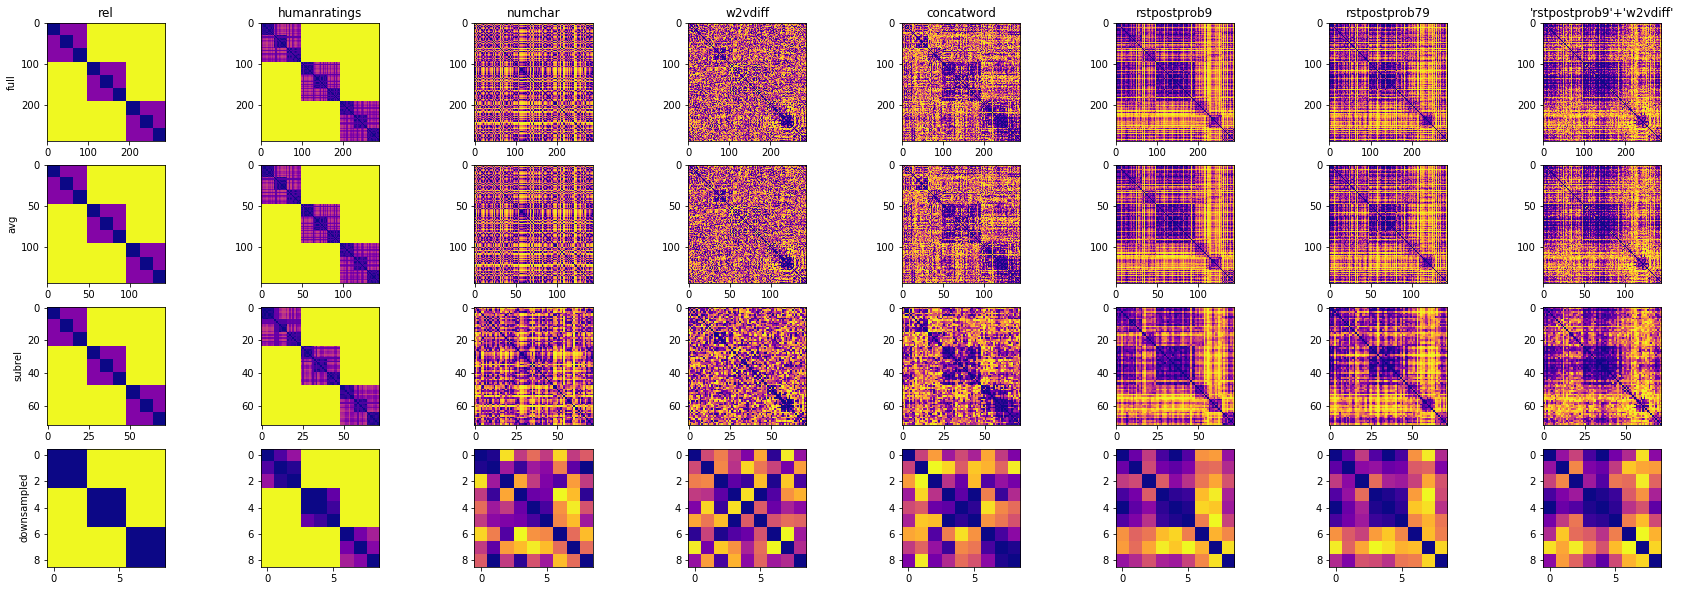

In [52]:
plotmodels(model_rdms, save=False)

## ROI Analysis
- Directly running spearman correlation between RDMs and model



In [13]:
# b = "cope-LSS"
try:
    corr_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)))
#     corr_ds_df = pd.read_csv(os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_ds.csv"))

except FileNotFoundError:
    analysis = []
    corr_df = run_rsa_dfs(full_rdms, model_rdms[model_rdms.type=="avg"].dropna(axis=1))
    analysis += ["full" for _ in range(len(corr_df))]

    corr_df.to_csv(
        os.path.join(paths["cloud"], "analysis", "rsa", "rsa_corrs_{}.csv".format(b)),
        index=False
    )

In [14]:
corrgp = corr_df.groupby(["betatype", "roi"])
corrgp.mean()

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l          0.005556 -0.004912  0.003854      0.002970 -0.006820   
         BA10m          0.006550 -0.003379  0.005051      0.004095 -0.015055   
         BA44           0.022157  0.012431  0.022115      0.022018  0.001697   
         BA45           0.023159  0.011106  0.022717      0.022148 -0.005631   
         BA46           0.007002 -0.003676  0.005386      0.004996 -0.015277   
         BA47           0.017338  0.007898  0.016920      0.017320 -0.003170   
         BA9            0.011743 -0.000192  0.010292      0.010685 -0.011456   
         csf            0.000930 -0.013744 -0.002078     -0.002572 -0.000904   
         dlpfc-power    0.013421 -0.000168  0.011773      0.011431 -0.007465   
         ipl-power      0.010994  0.003568  0.010425      0.010167 -0.007345   
         lag            0.018918  0.009725  0.018694      0.018584 -0.007509   
         laitg          0.001585 -0.016518 -0.002086     -0.002489 -0.012293   
         lastg          0.003648 -0.005637  0.002021      0.001089 -0.002035   
         lips           0.013779  0.003295  0.012818      0.013246 -0.003636   
         lpmtg          0.010703 -0.001058  0.009194      0.009002 -0.008316   
         lpstg          0.018909  0.004691  0.017626      0.016702 -0.004416   
         lspl           0.012186  0.004449  0.011659      0.011522  0.002410   
         ltomtg         0.030170  0.017811  0.030299      0.029532  0.000799   
         ltp            0.005925 -0.006291  0.003887      0.003229 -0.004086   
         psmg           0.014385  0.005337  0.013781      0.013846 -0.008256   
         rlpfc-hobeika  0.005281 -0.000914  0.004454      0.005025  0.002901   
         rlpfc-power    0.001358 -0.008436 -0.000583     -0.001333 -0.017097   
         spl-power      0.012472  0.006892  0.012426      0.012458  0.015403   
         v1             0.006706 -0.004249  0.005005      0.004055  0.045688   
         vlpfc-power    0.017823  0.004447  0.016619      0.016948  0.005260   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l          0.002899   -0.001581      0.004197      -0.001994   
         BA10m         -0.001125   -0.003870      0.004016      -0.001007   
         BA44           0.008296    0.012053      0.016587       0.014327   
         BA45           0.007580    0.015500      0.017271       0.015063   
         BA46          -0.000426    0.000113      0.009044       0.004000   
         BA47           0.004463    0.003482      0.009997       0.013321   
         BA9            0.005814    0.005469      0.021466       0.019208   
         csf           -0.000616   -0.008512      0.002224       0.000598   
         dlpfc-power    0.005233    0.004885      0.020054       0.016081   
         ipl-power      0.007105    0.007177      0.006607       0.006582   
         lag            0.004189    0.009140      0.013205       0.012531   
         laitg          0.003582   -0.004810      0.000522       0.000144   
         lastg          0.003013   -0.000565     -0.002470      -0.002031   
         lips           0.004760    0.005650      0.026543       0.026837   
         lpmtg          0.004863    0.000177      0.004631       0.004905   
         lpstg          0.004718   -0.002111      0.010244       0.010076   
         lspl           0.007946    0.010936      0.026383       0.024745   
         ltomtg         0.009818    0.014192      0.027347       0.025520   
         ltp            0.005346   -0.006266      0.003866       0.002270   
         psmg           0.005268    0.008867      0.008854       0.009868   
         rlpfc-hobeika  0.006258    0.006741      0.009246       0.009916   
         rlpfc-power    0.001011   -0.000193      0.003160      -0.000981   
         spl-pow

In [15]:
corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l          0.002926  0.001871  0.002820      0.002823  0.006243   
         BA10m          0.002530  0.002010  0.002485      0.002618  0.006416   
         BA44           0.004091  0.003831  0.004190      0.004253  0.005563   
         BA45           0.004281  0.004094  0.004306      0.004310  0.004834   
         BA46           0.003460  0.002603  0.003414      0.003531  0.005785   
         BA47           0.003868  0.004432  0.004151      0.004306  0.006939   
         BA9            0.002900  0.002794  0.002925      0.002688  0.004933   
         csf            0.002369  0.002208  0.002238      0.002178  0.003502   
         dlpfc-power    0.003401  0.003009  0.003430      0.003393  0.007090   
         ipl-power      0.002888  0.002634  0.002817      0.002841  0.005526   
         lag            0.003652  0.002532  0.003514      0.003552  0.005436   
         laitg          0.001974  0.001834  0.001985      0.002126  0.003213   
         lastg          0.002691  0.002543  0.002697      0.002709  0.003940   
         lips           0.003058  0.002595  0.003090      0.003014  0.005759   
         lpmtg          0.002512  0.002522  0.002616      0.002473  0.004230   
         lpstg          0.004771  0.003159  0.004723      0.004642  0.003758   
         lspl           0.002890  0.002804  0.002877      0.002923  0.006469   
         ltomtg         0.006238  0.005371  0.006471      0.006346  0.005821   
         ltp            0.002724  0.002549  0.002693      0.002712  0.004046   
         psmg           0.002782  0.002022  0.002656      0.002749  0.004932   
         rlpfc-hobeika  0.002959  0.002062  0.002918      0.002890  0.009158   
         rlpfc-power    0.002922  0.002559  0.002968      0.002949  0.004042   
         spl-power      0.002644  0.002965  0.002762      0.002769  0.007608   
         v1             0.001505  0.001281  0.001445      0.001584  0.010192   
         vlpfc-power    0.004287  0.004073  0.004473      0.004679  0.004794   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l          0.001336    0.002990      0.007393       0.007330   
         BA10m          0.001770    0.002973      0.007864       0.007147   
         BA44           0.002105    0.004786      0.011373       0.009718   
         BA45           0.002381    0.004486      0.008508       0.007860   
         BA46           0.002186    0.004920      0.005228       0.005589   
         BA47           0.002950    0.004272      0.008065       0.008032   
         BA9            0.001683    0.005110      0.011692       0.010558   
         csf            0.001899    0.002210      0.004211       0.003869   
         dlpfc-power    0.002604    0.005361      0.009686       0.008571   
         ipl-power      0.002173    0.003368      0.006845       0.006652   
         lag            0.001889    0.004298      0.006654       0.006220   
         laitg          0.001954    0.003063      0.004045       0.003412   
         lastg          0.002529    0.003123      0.006030       0.004991   
         lips           0.001175    0.005481      0.010321       0.009187   
         lpmtg          0.002424    0.004061      0.007015       0.006092   
         lpstg          0.002110    0.003095      0.009632       0.007990   
         lspl           0.002108    0.004409      0.006898       0.006925   
         ltomtg         0.001599    0.004643      0.011268       0.009409   
         ltp            0.002261    0.002057      0.007379       0.006597   
         psmg           0.001635    0.003831      0.005357       0.005816   
         rlpfc-hobeika  0.002796    0.005521      0.007699       0.008684   
         rlpfc-power    0.001695    0.004497      0.006222       0.006977   
         spl-pow

In [15]:
corrgp.mean() - 2.3 * corrgp.std()/np.sqrt(15)

mainrel    subrel       rel  humanratings   numchar  \
betatype roi                                                                   
cope-LSS BA10l         -0.001174 -0.009215 -0.002632     -0.003522 -0.021179   
         BA10m          0.000730 -0.008002 -0.000664     -0.001925 -0.029812   
         BA44           0.012748  0.003620  0.012477      0.012235 -0.011098   
         BA45           0.013312  0.001689  0.012813      0.012235 -0.016748   
         BA46          -0.000957 -0.009662 -0.002466     -0.003124 -0.028583   
         BA47           0.008443 -0.002295  0.007373      0.007416 -0.019129   
         BA9            0.005072 -0.006619  0.003564      0.004502 -0.022802   
         csf           -0.004519 -0.018822 -0.007224     -0.007581 -0.008960   
         dlpfc-power    0.005598 -0.007089  0.003883      0.003626 -0.023773   
         ipl-power      0.004352 -0.002490  0.003945      0.003632 -0.020056   
         lag            0.010517  0.003900  0.010612      0.010415 -0.020011   
         laitg         -0.002954 -0.020736 -0.006653     -0.007380 -0.019683   
         lastg         -0.002541 -0.011486 -0.004183     -0.005141 -0.011096   
         lips           0.006746 -0.002674  0.005711      0.006315 -0.016881   
         lpmtg          0.004926 -0.006858  0.003179      0.003314 -0.018044   
         lpstg          0.007935 -0.002574  0.006763      0.006025 -0.013059   
         lspl           0.005539 -0.002001  0.005041      0.004797 -0.012469   
         ltomtg         0.015822  0.005459  0.015414      0.014936 -0.012590   
         ltp           -0.000340 -0.012154 -0.002306     -0.003008 -0.013392   
         psmg           0.007987  0.000687  0.007672      0.007523 -0.019600   
         rlpfc-hobeika -0.001526 -0.005656 -0.002258     -0.001622 -0.018163   
         rlpfc-power   -0.005363 -0.014322 -0.007409     -0.008116 -0.026393   
         spl-power      0.006392  0.000074  0.006073      0.006088 -0.002096   
         v1             0.003243 -0.007195  0.001681      0.000413  0.022246   
         vlpfc-power    0.007963 -0.004921  0.006330      0.006187 -0.005766   

                         w2vdiff  concatword  rstpostprob9  rstpostprob79  \
betatype roi                                                                
cope-LSS BA10l         -0.000174   -0.008457     -0.012807      -0.018854   
         BA10m         -0.005197   -0.010708     -0.014071      -0.017446   
         BA44           0.003454    0.001045     -0.009570      -0.008024   
         BA45           0.002104    0.005183     -0.002296      -0.003015   
         BA46          -0.005454   -0.011204     -0.002980      -0.008854   
         BA47          -0.002322   -0.006342     -0.008552      -0.005153   
         BA9            0.001945   -0.006284     -0.005427      -0.005076   
         csf           -0.004984   -0.013595     -0.007461      -0.008302   
         dlpfc-power   -0.000756   -0.007445     -0.002223      -0.003633   
         ipl-power      0.002107   -0.000568     -0.009137      -0.008718   
         lag           -0.000157   -0.000744     -0.002098      -0.001776   
         laitg         -0.000912   -0.011855     -0.008780      -0.007705   
         lastg         -0.002805   -0.007749     -0.016339      -0.013511   
         lips           0.002058   -0.006957      0.002806       0.005706   
         lpmtg         -0.000711   -0.009162     -0.011503      -0.009107   
         lpstg         -0.000134   -0.009229     -0.011911      -0.008302   
         lspl           0.003097    0.000795      0.010517       0.008817   
         ltomtg         0.006142    0.003514      0.001431       0.003878   
         ltp            0.000145   -0.010996     -0.013106      -0.012903   
         psmg           0.001507    0.000055     -0.003467      -0.003510   
         rlpfc-hobeika -0.000174   -0.005957     -0.008462      -0.010057   
         rlpfc-power   -0.002888   -0.010535     -0.011152      -0.017027   
         spl-pow

In [39]:
# test whether difference of means is significant.

from scipy.stats import ttest_ind, ttest_1samp
from statsmodels.stats.multitest import multipletests

m = "lips"
comp_ps={}
for m in ["lips", "BA44", "BA45", "ltomtg", "lips", "psmg", "v1", "lspl", "spl-power", "ipl-power"]:
    # print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # print(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])


    pvals = []
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["w2vdiff"][corr_df.roi == m]))[1])
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["concatword"][corr_df.roi == m]))[1])
    # pvals.append(ttest_ind(np.arctanh(corr_df["rel"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
    pvals.append(ttest_1samp((corr_df["rstpostprob79"][corr_df.roi == m])-(corr_df["w2vdiff"][corr_df.roi == m]), 0)[1]/2)
    pvals.append(ttest_1samp((corr_df["rstpostprob79"][corr_df.roi == m])-(corr_df["concatword"][corr_df.roi == m]),0)[1]/2)
    # pvals.append(ttest_ind(np.arctanh(corr_df["concatword"][corr_df.roi == m]), np.arctanh(corr_df["rstpostprob79"][corr_df.roi == m]))[1])
    pvals.append(ttest_1samp((corr_df["concatword"][corr_df.roi == m])-(corr_df["w2vdiff"][corr_df.roi == m]),0)[1]/2)


    comp_ps[m] = multipletests(pvals, method="fdr_bh")[1]

In [41]:
pd.DataFrame(comp_ps).T

,0,1,2
lips,0.033543,0.033543,0.433277
BA44,0.371919,0.424784,0.371919
BA45,0.231533,0.480840,0.184148
ltomtg,0.175752,0.188785,0.188785
psmg,0.343222,0.446022,0.343222
v1,0.011939,0.020963,0.050090
lspl,0.046682,0.113155,0.219851
spl-power,0.049091,0.119201,0.119201
ipl-power,0.493006,0.493006,0.493006


In [26]:
from statsmodels.stats.multitest import multipletests

tvalues, pvalues, corr_p = {}, {}, {}


for roi in corr_df.roi.unique():
#     tvalues[model] = []
    pvalues[roi] = []
    for model in ["w2vdiff", "concatword", "rstpostprob79"]:
#         t = rsa.wilcoxon(corr_df[model][corr_df.roi == roi])
#         tvalues[model].append(t.statistic)
#         pvalues[model].append(t.pvalue)
        
        pvalues[roi].append(
            rsa.wilcoxon_onesided(
                corr_df[model][corr_df.roi == roi]
            ))
    corr_p[roi] = multipletests(pvalues[roi])[1]

tvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79"]
pvalues["model"] = ["w2vdiff", "concatword", "rstpostprob79"]
corr_p["model"] = ["w2vdiff", "concatword", "rstpostprob79"]
# tvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# pvalues["roi"] = [roi for roi in corr_df.roi.unique()]
# corr_p["roi"] = [roi for roi in corr_df.roi.unique()]

In [30]:
pd.DataFrame(pvalues).T

,0,1,2
BA10m,0.795978,0.872355,0.418069
BA10l,0.024711,0.541184,0.32083
BA44,0.00135385,0.0114474,0.0393654
BA9,0.00306668,0.218983,0.0813367
BA45,0.00135385,0.00261695,0.0351629
BA46,0.660442,0.418069,0.138765
BA47,0.0738301,0.162935,0.0544704
lpstg,0.024711,0.732537,0.162935
laitg,0.0439678,0.918663,0.621816
lpmtg,0.024711,0.418069,0.732537


In [42]:
pvalues["ba44"]

[0.0013538538590129523,
 0.011447392091562291,
 0.03936540559806701,
 0.00038820574953187426]

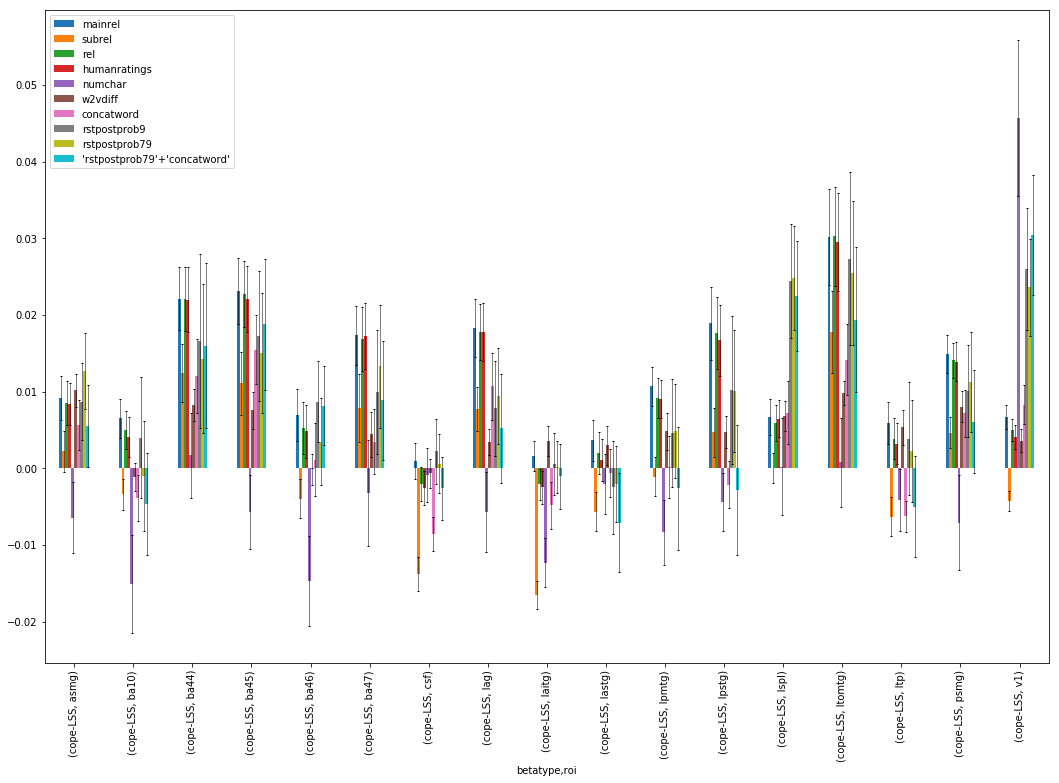

In [25]:
# DO NOT RUN
# cope Results
corrgp=corr_df.groupby(["betatype", "roi"])
ax = plot_results(corrgp)